<a href="https://colab.research.google.com/github/ibonetc/DeepLearning_Salud/blob/main/DL_ClasificacionCancerPulmon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transferencia de conocimiento

Existen varias redes ya entrenadas para otros casos que pueden ser reusadas para clasificación, reusando los pesos ya entrenados de algunas de sus capas. Específicamente de las capas que se encargan de extraer rasgos importantes de los objetos.

## Datos de cáncer de pulmón
Se van a usar algunas imágenes para poder hacer la clasificación en subtipos de carcinomas pulmonares de células no-pequeñas:


*   **Adenocarcinoma**
*   Carcinoma pulmonar de células grandes (**large cell carcinoma**)
*   Carcinoma espinocelular (**squamous cell carcinoma**)

Y además hay algunas imágenes sin cáncer (**Normal**)



In [ ]:
!unzip '/content/drive/MyDrive/HealthData/CancerPulmon.zip'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Cargar los datos

In [3]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [4]:
batch_size=32
train_it = datagen.flow_from_directory('/content/CancerPulmon/train', class_mode='categorical', batch_size=batch_size, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/CancerPulmon/test', class_mode='categorical', batch_size=batch_size, target_size=(224, 224), shuffle=False)

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


## VGG-16

La base de datos VGG16 es una red que se utiliza mucho en clasificación, haciendo transferencia de conocimiento, ha msotrado tener buen poder de extración de rasgos.

Fue entrenada para clasificar 1000 objetos diferentes y utiliza una entrada de 224x224 con canal RGB.

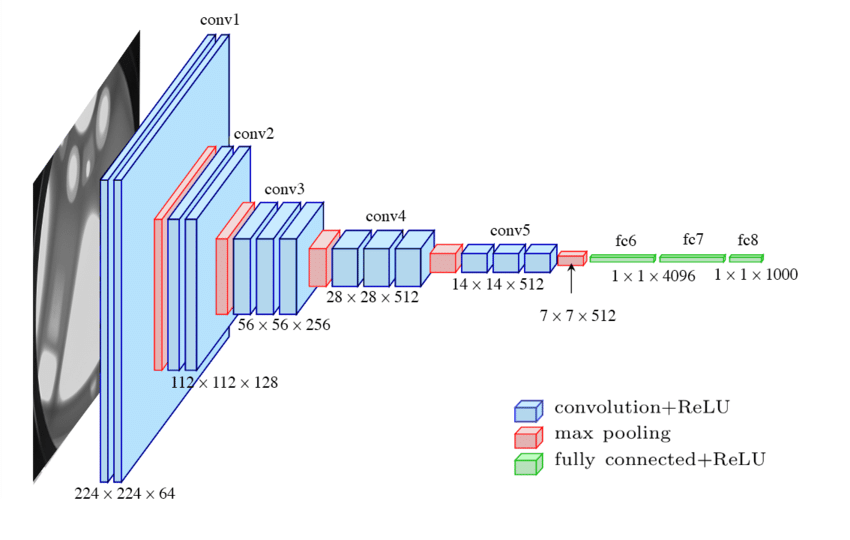
Tomada de: https://www.researchgate.net/publication/322512435_Automatic_localization_of_casting_defects_with_convolutional_neural_networks


In [34]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.utils import plot_model

In [41]:
model = VGG16()

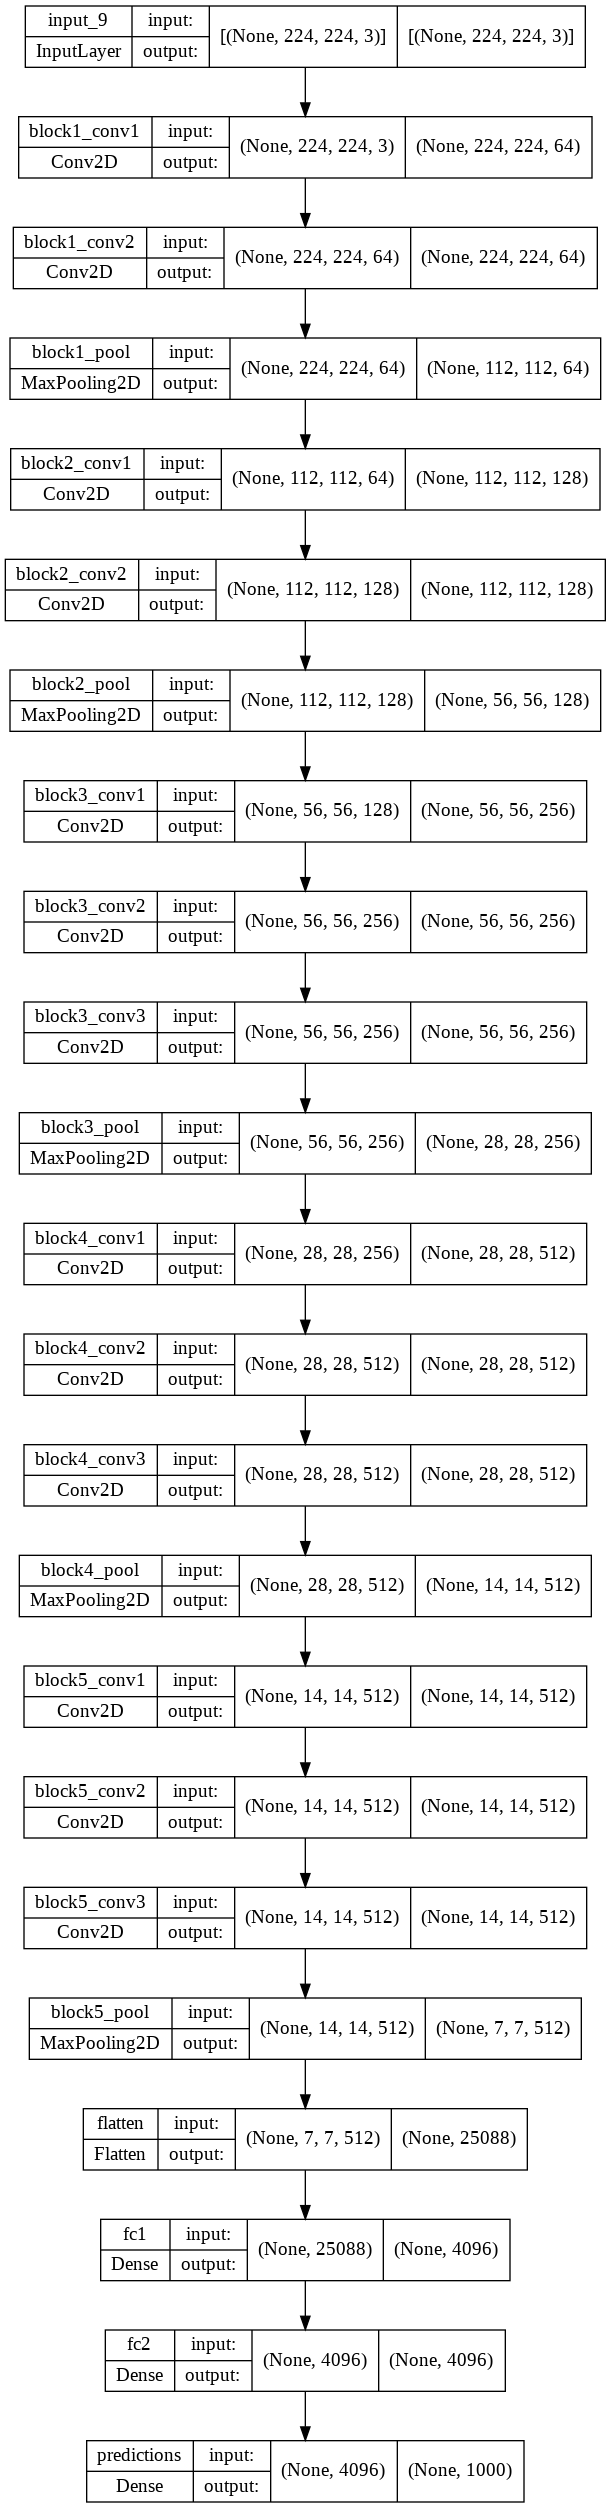

In [42]:
plot_model(model,show_shapes=True)

In [38]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))

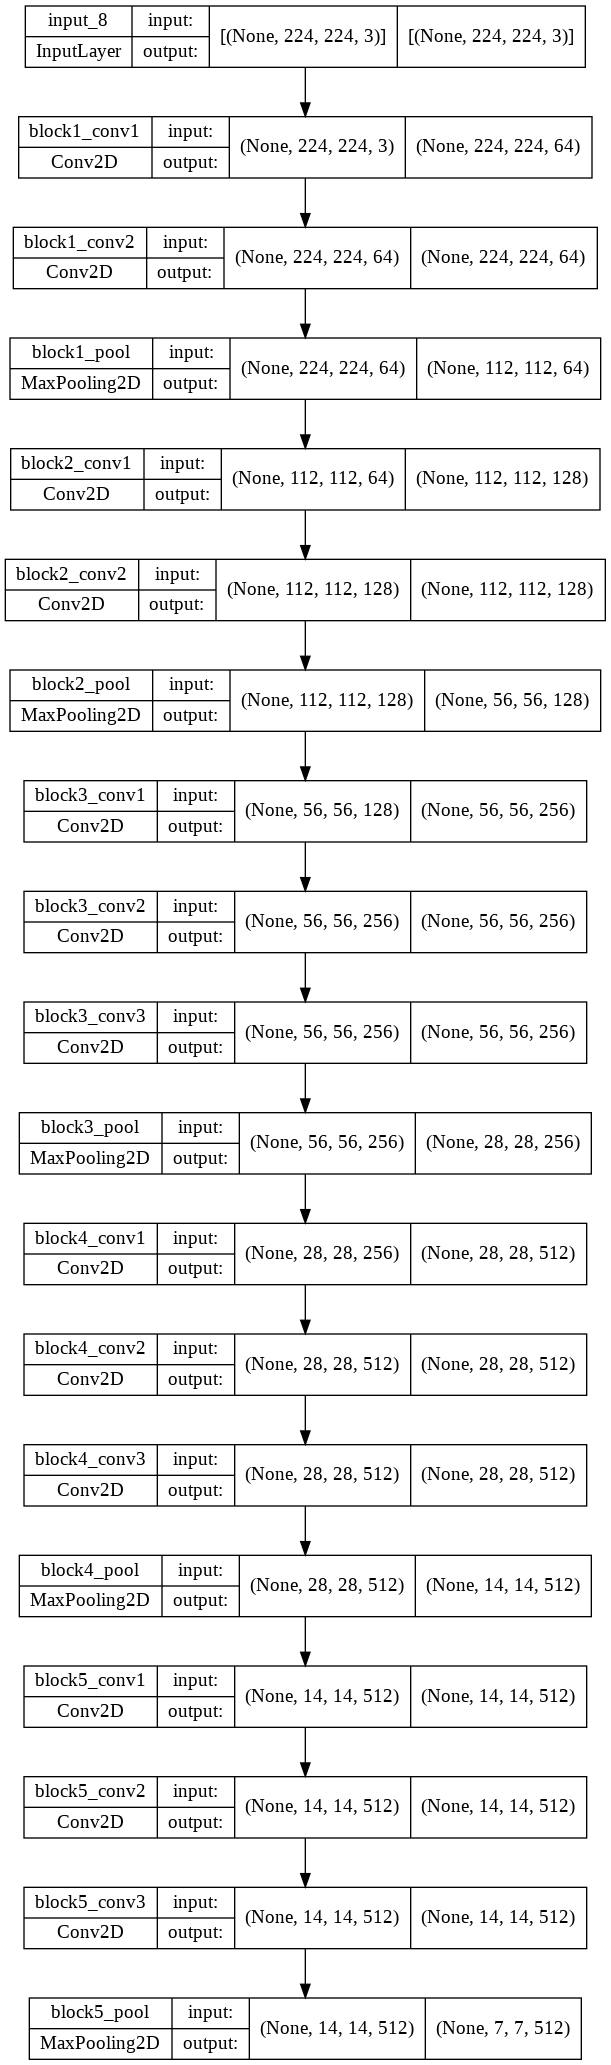

In [40]:
plot_model(model,show_shapes=True)

In [14]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=model.inputs, outputs=output)

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_it,validation_data=test_it,epochs=20)

Epoch 1/20
20/20 [==============================] - 15s 720ms/step - loss: 1.3487 - accuracy: 0.4046 - val_loss: 1.0791 - val_accuracy: 0.3651
Epoch 2/20
20/20 [==============================] - 9s 443ms/step - loss: 0.9240 - accuracy: 0.5383 - val_loss: 1.0252 - val_accuracy: 0.4571
Epoch 3/20
20/20 [==============================] - 9s 439ms/step - loss: 0.6933 - accuracy: 0.7178 - val_loss: 0.8799 - val_accuracy: 0.5524
Epoch 4/20
20/20 [==============================] - 9s 441ms/step - loss: 0.5944 - accuracy: 0.7602 - val_loss: 0.8783 - val_accuracy: 0.5968
Epoch 5/20
20/20 [==============================] - 9s 443ms/step - loss: 0.5051 - accuracy: 0.8222 - val_loss: 0.8307 - val_accuracy: 0.5619
Epoch 6/20
20/20 [==============================] - 9s 444ms/step - loss: 0.4466 - accuracy: 0.8418 - val_loss: 0.8331 - val_accuracy: 0.6190
Epoch 7/20
20/20 [==============================] - 9s 442ms/step - loss: 0.3903 - accuracy: 0.8760 - val_loss: 0.7337 - val_accuracy: 0.7206
Epoch

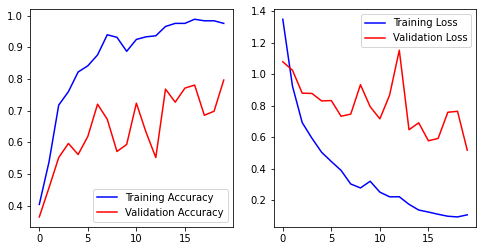

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [23]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
x = Dropout(0.2)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=model.inputs, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_it,validation_data=test_it,epochs=20)

Epoch 1/20
20/20 [==============================] - 10s 462ms/step - loss: 1.7791 - accuracy: 0.4192 - val_loss: 1.0258 - val_accuracy: 0.4952
Epoch 2/20
20/20 [==============================] - 9s 443ms/step - loss: 0.7909 - accuracy: 0.6476 - val_loss: 0.8984 - val_accuracy: 0.5524
Epoch 3/20
20/20 [==============================] - 9s 441ms/step - loss: 0.6573 - accuracy: 0.7162 - val_loss: 0.8287 - val_accuracy: 0.7079
Epoch 4/20
20/20 [==============================] - 9s 442ms/step - loss: 0.4631 - accuracy: 0.8254 - val_loss: 0.8637 - val_accuracy: 0.6825
Epoch 5/20
20/20 [==============================] - 9s 444ms/step - loss: 0.3509 - accuracy: 0.8679 - val_loss: 0.7442 - val_accuracy: 0.7524
Epoch 6/20
20/20 [==============================] - 9s 443ms/step - loss: 0.3153 - accuracy: 0.8874 - val_loss: 0.7662 - val_accuracy: 0.7365
Epoch 7/20
20/20 [==============================] - 9s 446ms/step - loss: 0.2644 - accuracy: 0.8907 - val_loss: 0.6626 - val_accuracy: 0.7937
Epoch

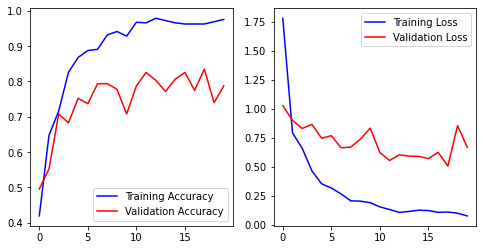

In [25]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [26]:
l,a=model.evaluate(test_it)

10/10 [==============================] - 3s 306ms/step - loss: 0.6665 - accuracy: 0.7873


In [27]:
tp=model.predict(test_it)

In [28]:
y_predicted=np.argmax(tp, axis=1)
y_predicted

array([0, 0, 0, 3, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 3, 0, 3, 3, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 3, 3, 0, 0, 3, 1, 3, 0, 3,
       0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 1, 3, 3, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 1, 1, 0, 0, 0, 3, 0, 0, 0,
       1, 0, 3, 0, 0, 1, 3, 1, 0, 3, 1, 1, 0, 0, 0, 0, 1, 3, 1, 0, 1, 0,
       3, 3, 0, 1, 3, 3, 3, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,

In [29]:
test_it.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [30]:
test_it.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [31]:
class_names=[k for k in test_it.class_indices.keys()]

In [32]:
cm=confusion_matrix(test_it.classes,y_predicted)
cm

array([[61, 22,  0, 37],
       [ 0, 51,  0,  0],
       [ 0,  1, 53,  0],
       [ 3,  4,  0, 83]])

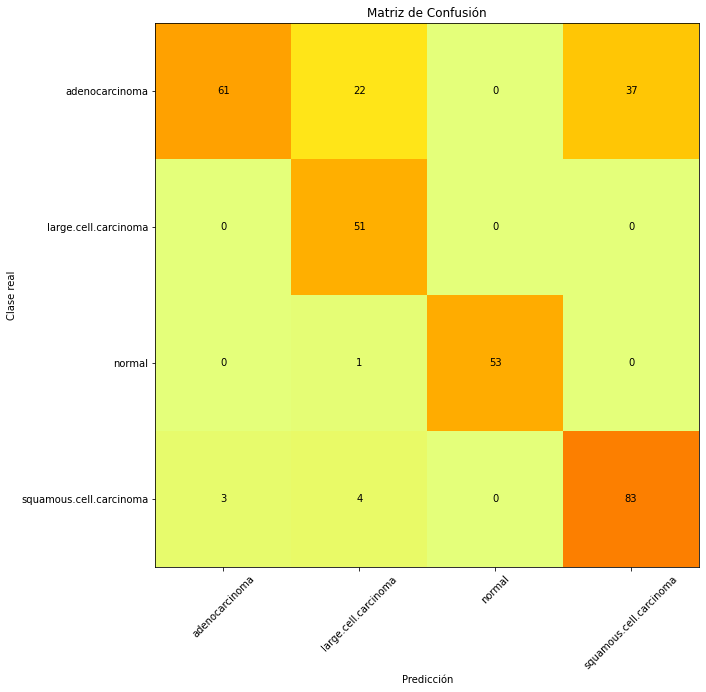

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = class_names
plt.title('Matriz de Confusión')
plt.ylabel('Clase real')
plt.xlabel('Predicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i, str(cm[i][j]),ha="center", va="center")
        plt.rcParams["axes.grid"] = False
plt.show()

## VGG-19
Esta es otra red que surge como una variación de la anterior, también entrenada con entradas de 224x224 e imágenes RGB

In [43]:
from tensorflow.keras.applications.vgg19 import VGG19

Haga un modelo, usando la red VGG-19 y transferencia de conocmiento, para entrenar los mismos datos.

## Inception V3

Esta es otra red entrenada con entradas de 299x299 e imágenes RGB.

Para ejecutar esta debe volver a cargar las imágenes, ahora con este tamaño, o si las imágenes son más pequeñas tmabién se podría poner el input de la red más pequeño.

In [44]:
from tensorflow.keras.applications import InceptionV3